In [1]:
a=file.choose()
b=read.table(a,header=T)

In [2]:
s1=b[1:6,1]
s2=b[7:12,1]
s3=b[13:18,1]

In [3]:
mean(s1);sd(s1)
mean(s2);sd(s2)
mean(s3);sd(s3)

[1] 13.83333

[1] 1.722401

[1] 15

[1] 5.215362

[1] 18

[1] 1.264911

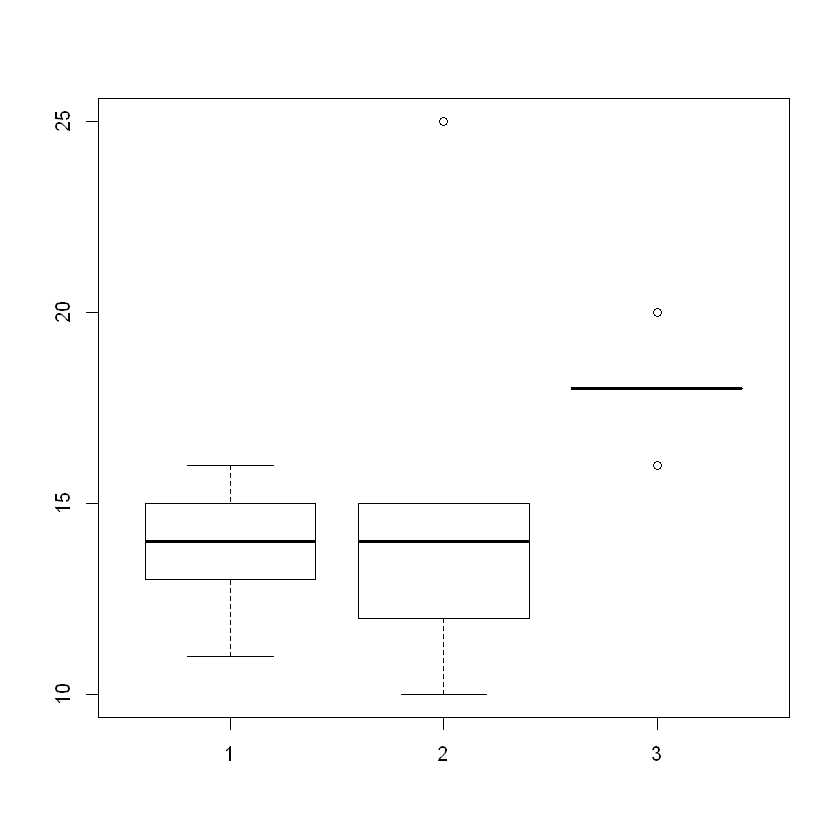

In [4]:
boxplot(s1, s2, s3)


	Shapiro-Wilk normality test

data:  s1
W = 0.96137, p-value = 0.8302


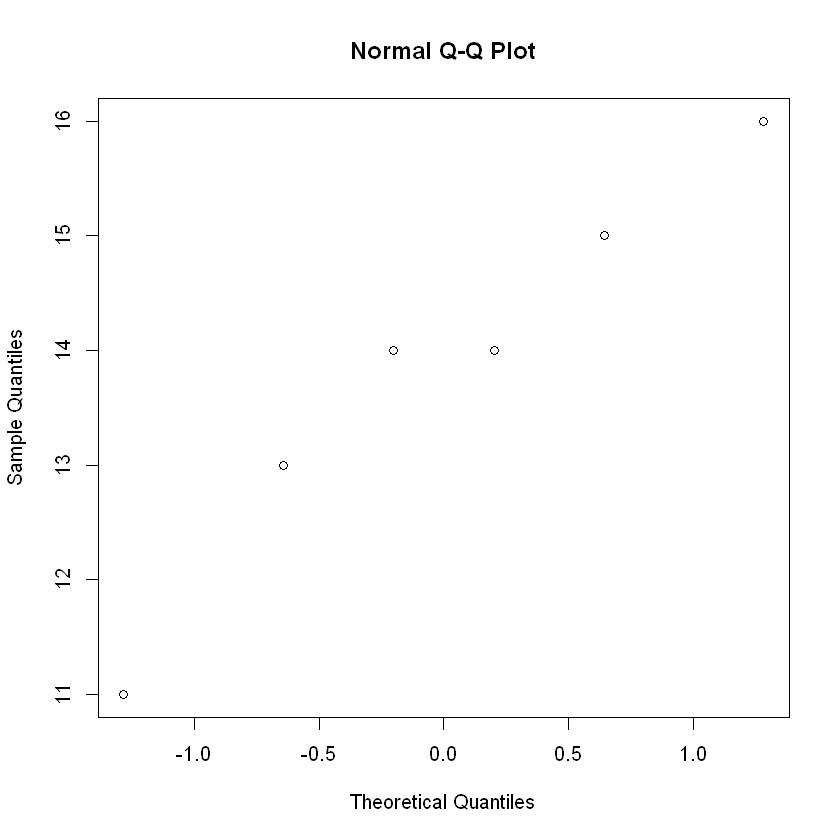


	Shapiro-Wilk normality test

data:  s2
W = 0.80861, p-value = 0.07015


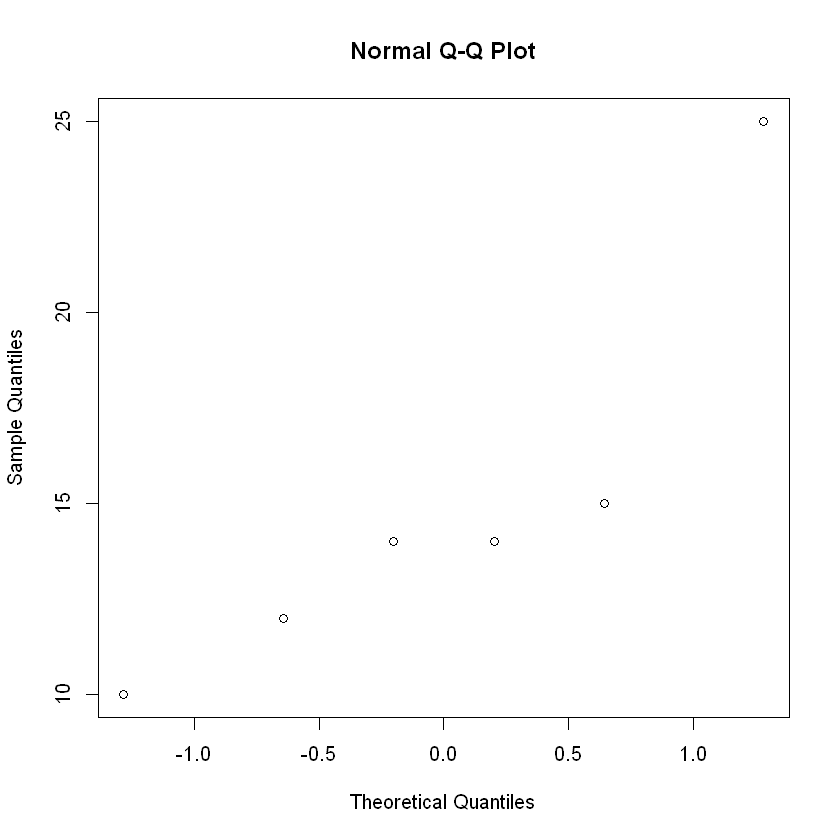


	Shapiro-Wilk normality test

data:  s3
W = 0.82682, p-value = 0.101


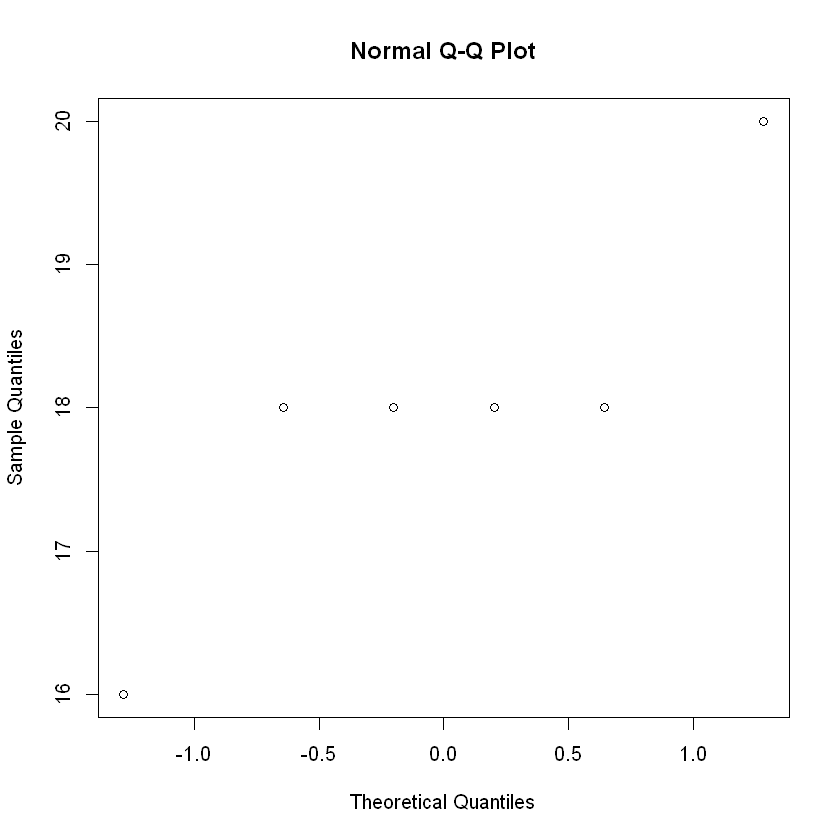

In [5]:
qqnorm(s1)
shapiro.test(s1)

qqnorm(s2)
shapiro.test(s2)

qqnorm(s3)
shapiro.test(s3)

In [6]:
y=b[,1]
group=b[,2]

In [7]:
leveneTest(y, group=factor(group), center=mean) 

ERROR: Error in leveneTest(y, group = factor(group), center = mean): could not find function "leveneTest"



	Shapiro-Wilk normality test

data:  rr
W = 0.80078, p-value = 0.001558


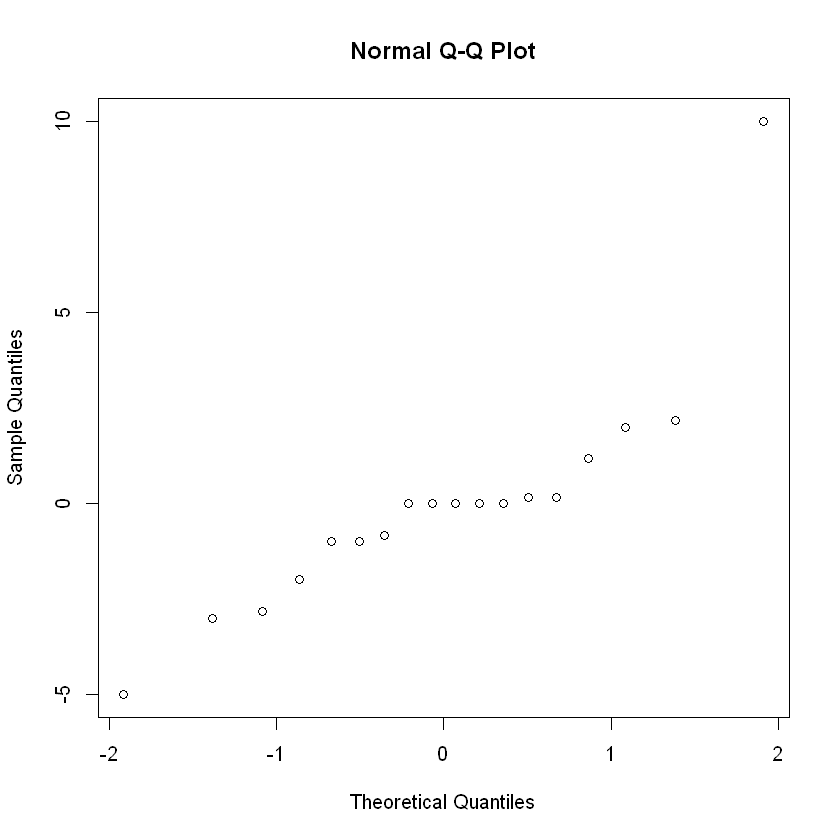

In [8]:
# normality, small sample size
rr=y-c(rep(mean(s1),6), rep(mean(s2),6),rep(mean(s3),6))
shapiro.test(rr)
qqnorm(rr)

In [9]:
data = data.frame(y = y, group = factor(group))
z=aov(y ~ group, data=data)
summary(z)

            Df Sum Sq Mean Sq F value Pr(>F)
group        2  55.44   27.72   2.618  0.106
Residuals   15 158.83   10.59               

In [10]:
pairwise.t.test(y, group, p.adj = "bonf")


	Pairwise comparisons using t tests with pooled SD 

data:  y and group 

  1    2   
2 1.00 -   
3 0.13 0.39

P value adjustment method: bonferroni 

In [11]:
pairwise.t.test(y, group, p.adj = "holm")


	Pairwise comparisons using t tests with pooled SD 

data:  y and group 

  1    2   
2 0.54 -   
3 0.13 0.26

P value adjustment method: holm 

In [12]:
TukeyHSD(z)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = y ~ group, data = data)

$group
        diff        lwr      upr     p adj
2-1 1.166667 -3.7132808 6.046614 0.8110192
3-1 4.166667 -0.7132808 9.046614 0.1004074
3-2 3.000000 -1.8799475 7.879947 0.2773123


In [ ]:
# no significant difference between learning methods, 
# maybe between 3 and 1 depending on p val threshold level